#### Ejercicio 6.1 imagen Saigon 

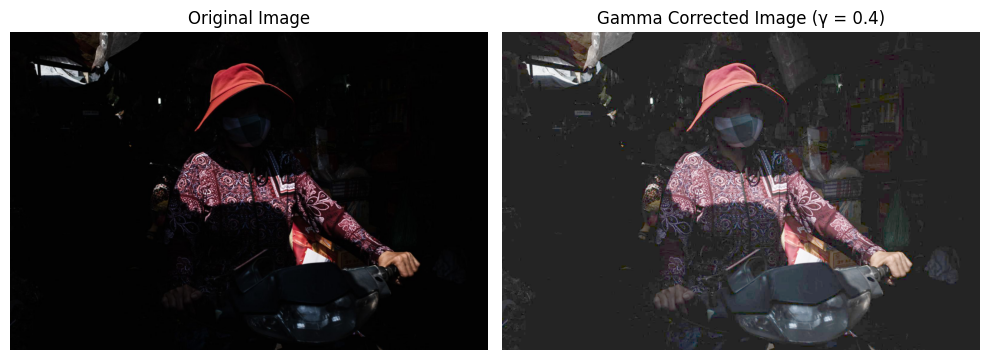

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the file
image_path = './imgs/saigon.jpeg'
image = Image.open(image_path)  # Keep the image in color
image_array = np.array(image)

def gamma_transformation(image_array, gamma):
    # Normalize the pixel values to [0, 1]
    normalized_image = image_array / 255.0

    # Apply gamma correction
    gamma_corrected = normalized_image ** gamma

    # Convert back to [0, 255]
    gamma_corrected_image = np.uint8(gamma_corrected * 255)

    return gamma_corrected_image

# Apply gamma transformation to the image array
gamma_value = 0.4  # Example gamma value; you can adjust this as needed
image_gamma_corrected = gamma_transformation(image_array, gamma_value)

# Convert the gamma-corrected array back to an image
image_gamma_corrected_pil = Image.fromarray(image_gamma_corrected)

# Display the original and gamma-corrected images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Gamma-corrected image
axes[1].imshow(image_gamma_corrected_pil)
axes[1].set_title(f'Gamma Corrected Image (γ = {gamma_value})')
axes[1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Ejercicio 6.2 imagen Monkey

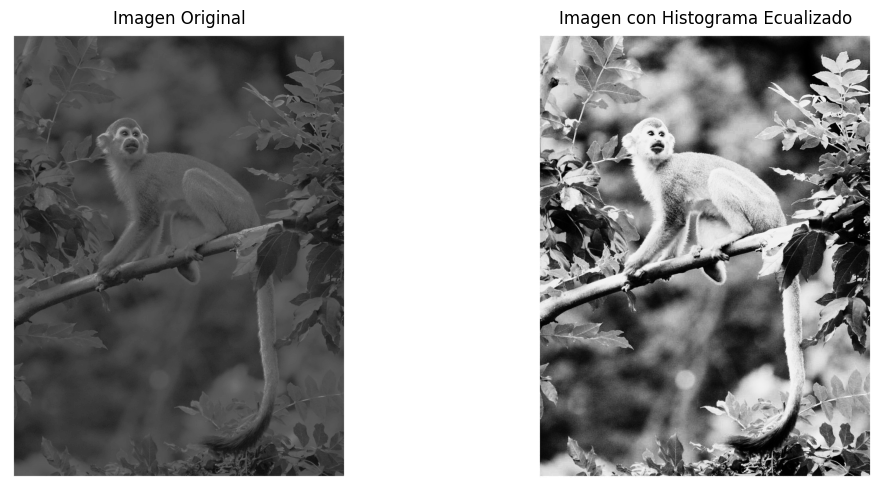

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def histogram_equalization(image_array):
    # Aplanar el array de la imagen y calcular el histograma
    histogram, _ = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

    # Calcular la función de distribución acumulativa
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # Usar la función de distribución acumulativa para mapear los viejos valores de píxeles a nuevos
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Mapear los viejos valores a los nuevos
    image_equalized = cdf[image_array]

    return image_equalized

# Cargar la imagen y convertirla a escala de grises
monkey_image_path = './imgs/monkey.jpeg'  # Actualizar con la ruta correcta
monkey_image = Image.open(monkey_image_path).convert('L')
monkey_array = np.array(monkey_image)

# Aplicar la ecualización del histograma
monkey_equalized_array = histogram_equalization(monkey_array)

# Convertir de nuevo a imagen PIL
monkey_equalized_image = Image.fromarray(monkey_equalized_array)

# Mostrar la imagen original y la imagen con histograma ecualizado lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Imagen original
axes[0].imshow(monkey_image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Imagen con histograma ecualizado
axes[1].imshow(monkey_equalized_image, cmap='gray')
axes[1].set_title('Imagen con Histograma Ecualizado')
axes[1].axis('off')

plt.tight_layout()
plt.show()


#### Ejercicio 6.3 imagen Rice

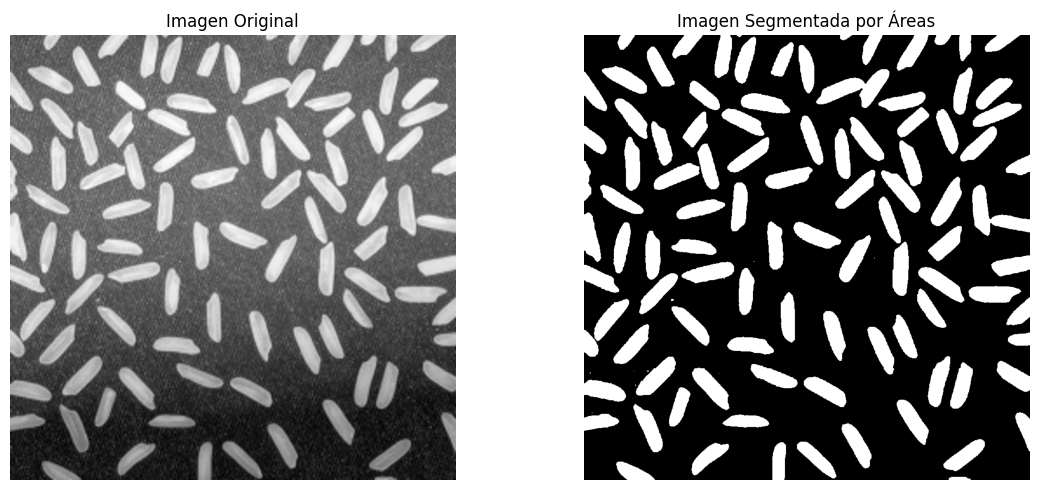

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
rice_image_path = './Imgs/rice.jpg'  # Reemplazar con la ruta correcta a tu imagen
rice_image = Image.open(rice_image_path).convert('L')  # Convertir a escala de grises

# Convertir a array de NumPy
rice_array = np.array(rice_image)

def otsu_threshold(region):
    histogram, bin_edges = np.histogram(region, bins=256, range=(0, 255))
    histogram_normalized = histogram / histogram.sum()
    cumulative_sum = np.cumsum(histogram_normalized)
    cumulative_mean = np.cumsum(histogram_normalized * np.arange(256))
    global_mean = cumulative_mean[-1]

    otsu_threshold = 0
    max_between_class_variance = 0

    for i in range(1, 256):
        probability_class_1 = cumulative_sum[i]
        probability_class_2 = 1 - probability_class_1
        mean_class_1 = cumulative_mean[i] / probability_class_1 if probability_class_1 > 0 else 0
        mean_class_2 = (global_mean - cumulative_mean[i]) / probability_class_2 if probability_class_2 > 0 else 0
        between_class_variance = probability_class_1 * probability_class_2 * (mean_class_1 - mean_class_2) ** 2

        if between_class_variance > max_between_class_variance:
            max_between_class_variance = between_class_variance
            otsu_threshold = i

    return otsu_threshold

# Dividir la imagen en regiones y calcular el umbral de Otsu para cada una
num_regions = 4  # Por ejemplo, un grid de 4x4
segmented_image = np.zeros_like(rice_array)

for i in range(num_regions):
    for j in range(num_regions):
        start_x, start_y = i * rice_array.shape[0] // num_regions, j * rice_array.shape[1] // num_regions
        end_x, end_y = (i + 1) * rice_array.shape[0] // num_regions, (j + 1) * rice_array.shape[1] // num_regions
        region = rice_array[start_x:end_x, start_y:end_y]
        threshold = otsu_threshold(region)
        segmented_image[start_x:end_x, start_y:end_y] = region > threshold

# Graficar la imagen original y la segmentada lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Imagen original
axes[0].imshow(rice_image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Imagen segmentada
axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title('Imagen Segmentada por Áreas')
axes[1].axis('off')

plt.tight_layout()
plt.show()
